In [8]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
voila 0.2.10 requires nbconvert<7,>=6.0.0, but you have nbconvert 5.6.1 which is incompatible.


In [9]:
from fastbook import *
from fastai.vision.widgets import *

In [10]:
import urllib.request

In [16]:
MODEL_URL = "https://www.dropbox.com/s/az08lhvrdqbpssp/export.pkl?dl=1"
urllib.request.urlretrieve(MODEL_URL, "model.pkl")

('model.pkl', <http.client.HTTPMessage at 0x2429224cfa0>)

In [17]:
learner_inf = load_learner(Path("."), "model.pkl")

PermissionError: [Errno 13] Permission denied: '.'

In [33]:
learn_inf.predict('animals/cat/cat.jpg')

('cat', tensor(0), tensor([1.0000e+00, 2.9642e-09, 2.1304e-07]))

In [34]:
learn_inf.dls.vocab

['cat', 'dog', 'horse']

In [35]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

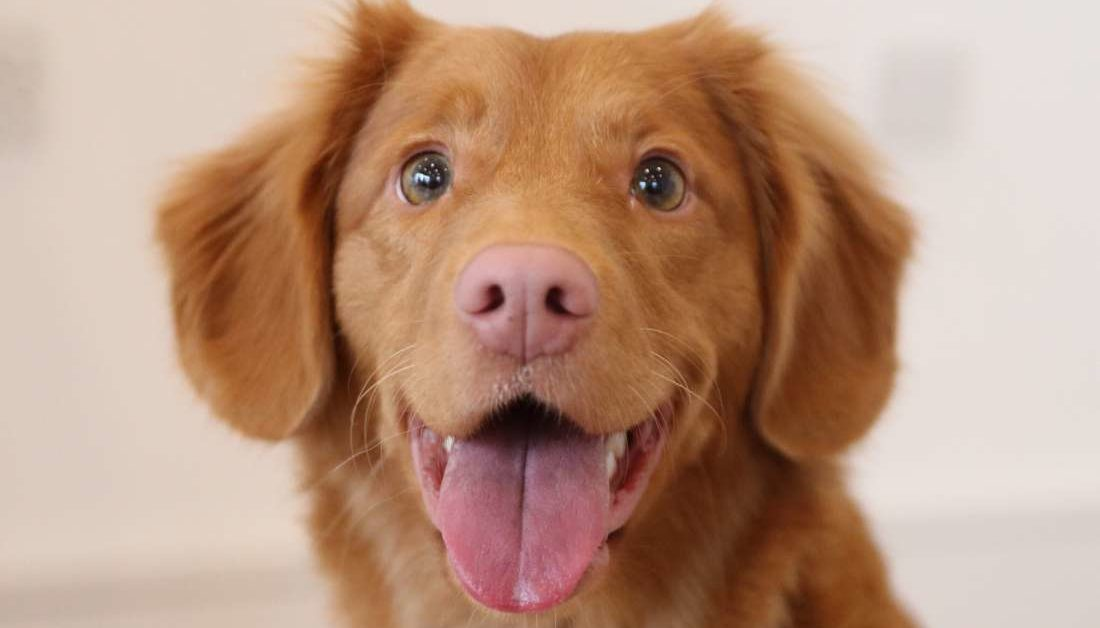

In [36]:
img = PILImage.create(btn_upload.data[-1])
img

In [37]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128, 128))
out_pl

Output()

In [38]:
pred, pred_idx, probs = learn_inf.predict(img)

In [39]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]: .04f}'
lbl_pred

Label(value='Prediction: dog; Probability:  1.0000')

In [40]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [41]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128, 128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [42]:
btn_upload = widgets.FileUpload()

In [43]:
VBox([widgets.Label('Select your animal!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [44]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
nbdev 1.1.14 requires nbconvert<6, but you have nbconvert 6.0.7 which is incompatible.



  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


Enabling: voila
- Writing config: D:\Anaconda3\envs\tf-gpu\etc\jupyter
    - Validating...
      voila 0.2.10 ok
